# Importing Libraries and Datasets 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('C:/Users/ceesa/Desktop/BEDU/Course Project/titanic/train.csv')
test_data = pd.read_csv('C:/Users/ceesa/Desktop/BEDU/Course Project/titanic/test.csv')
train = train_data.copy()
test = test_data.copy()

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.drop(['PassengerId'], axis = 1, inplace = True)
test.drop(['PassengerId'], axis = 1, inplace = True)
pred = train_data['Survived']


In [53]:
pred.to_csv('pred.csv')

In [5]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Plan de acción
### Haremos los siguintes procedimientos
###### Data Visualization
###### Data Processing
###### Filling Missing Values
###### Encoding


In [6]:
# Missiong Values

train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### Esta es la lista de los valores faltantes de el set de entrenamiento y el set de prueba

# Features

#### En esta seccion veremos todas las características en nuestro dataset. Habrán visualizaciones de datos usando diferentes gráficos y procesos en ambos sets de datos.

#### 1. SEX

<AxesSubplot:xlabel='Sex', ylabel='count'>

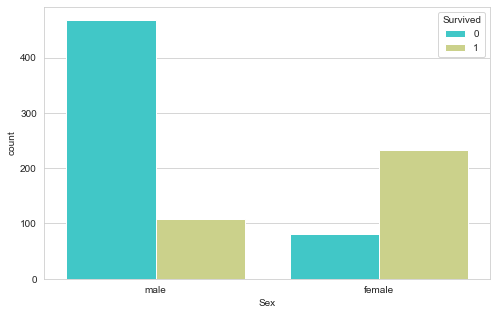

In [8]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', hue = 'Survived', data = train_data, palette = 'rainbow')

In [9]:
sex1 = pd.get_dummies(train['Sex'])
sex2 = pd.get_dummies(test['Sex'])

train.drop(['Sex'],axis = 1, inplace = True)
test.drop(['Sex'],axis =1, inplace = True)

train = pd.concat([train,sex1], axis = 1)
test =  pd.concat([test,sex2], axis = 1)

###### Aquí .get_dummies() convertirá esta columna y hará dos columnas dummy de hombre y mujer. Esto para convertir datos cateoricos a datos numéricos.

In [10]:
train.drop(['female'], axis = 1, inplace = True)
test.drop(['female'], axis = 1, inplace = True)

#### 2. Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

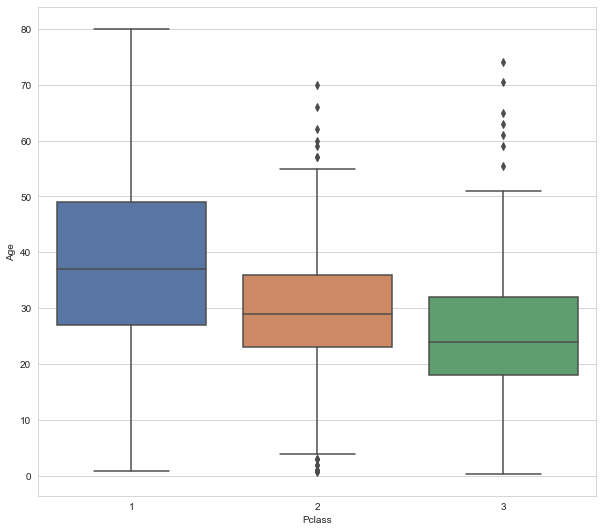

In [11]:
plt.figure(figsize = (10,9))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data, palette = 'deep')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

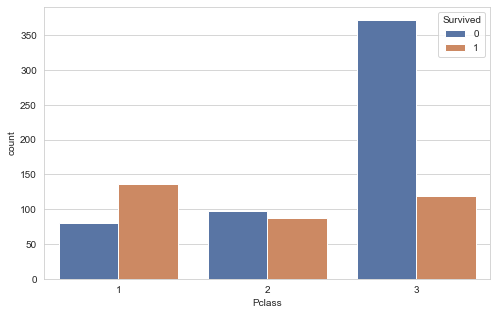

In [12]:
plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data, palette = 'deep')

###### Aquí podemos ver que los pasajeros de primera clase tuvieron más chances de sobrevivir.

#### 3. Age

Text(0, 0.5, 'Density')

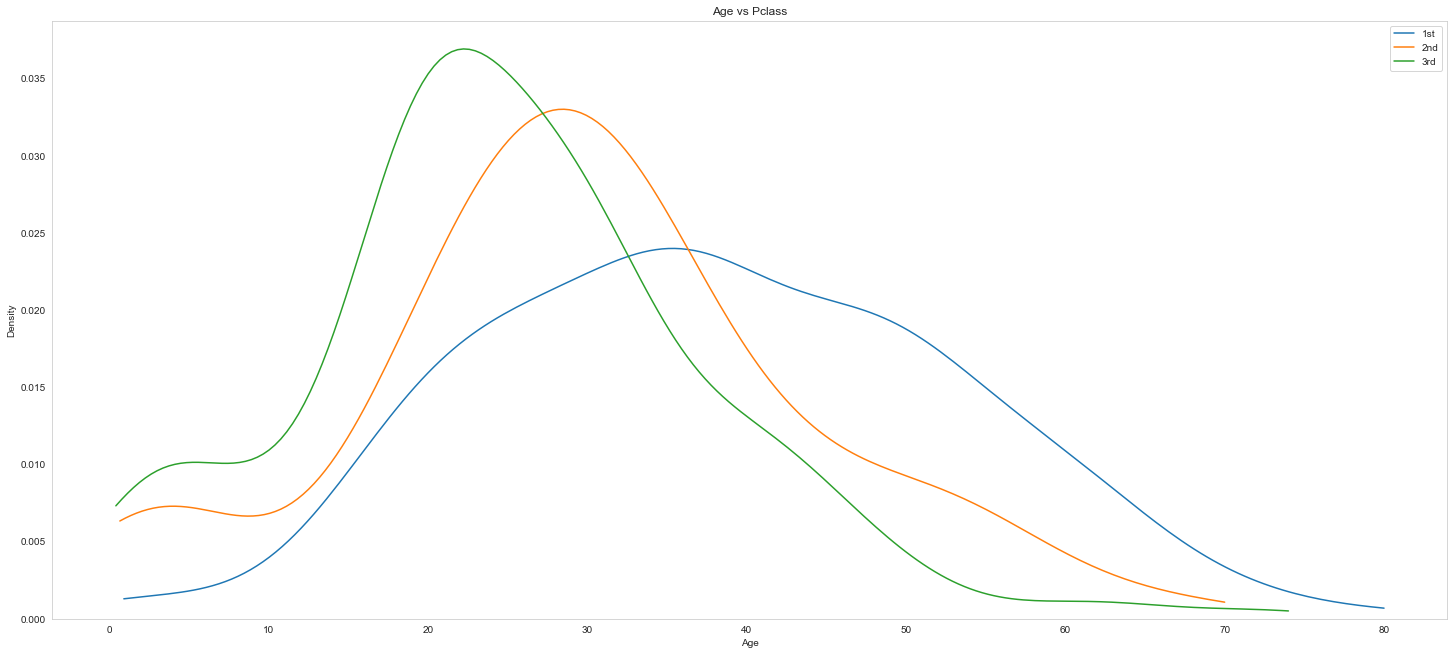

In [13]:
plt.figure(figsize = (25, 11 ))
for x in [1,2,3]: ## FOR 3 CLASSES
    sns.kdeplot(data = train_data.Age[train_data.Pclass == x], cut = 0, clip = (0,200)).grid(False)
    
plt.title('Age vs Pclass')
plt.legend(('1st', '2nd', '3rd'))
plt.xlabel('Age')
plt.ylabel('Density')

###### Esta gráfica muestra la densidad de gente que pertenecía a las tres clases respecto a su edad.

##### Los valores faltantes se deben llenar con el valor de la mediana 

In [14]:
# De todos estos valores, la mediana es el 50%
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
train['Age'].fillna(train['Age'].describe().loc[['50%']][0], inplace = True)

In [16]:
test['Age'].fillna(train['Age'].describe().loc[['50%']][0], inplace = True)

#### 4. Fare

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare distribution for all people')

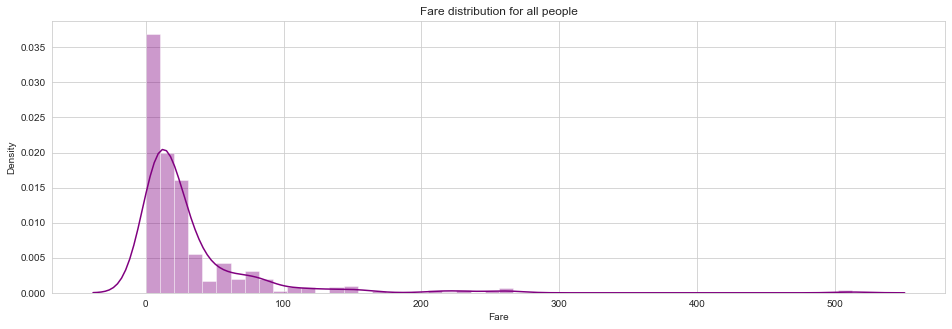

In [17]:
f,axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train['Fare'], color = 'purple', ax = axes)
plt.title('Fare distribution for all people')

In [18]:
Fare_0 = []
Fare_1 = []
for f in range(0,891):
    if train_data['Survived'][f] == 0:
        Fare_0.append(train['Fare'][f])
    else:
        Fare_1.append(train['Fare'][f])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


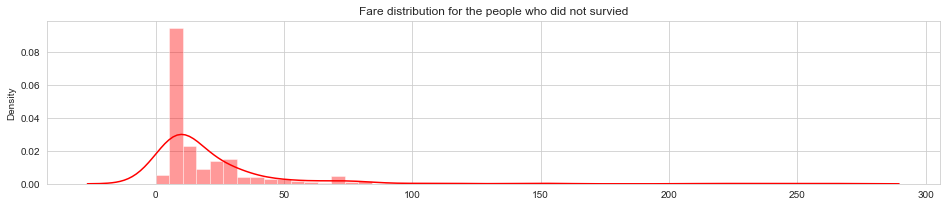

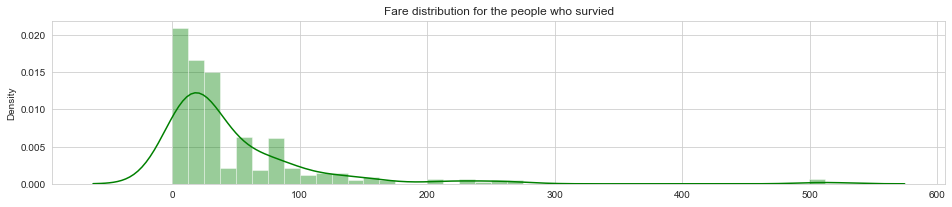

In [19]:
f, axes = plt.subplots(1,1, figsize = (16,3))
g1 = sns.distplot(Fare_0, color = 'red', ax = axes)
plt.title('Fare distribution for the people who did not survied')

f, axes = plt.subplots(1,1, figsize = (16,3))
g1 = sns.distplot(Fare_1, color = 'green', ax = axes)
plt.title('Fare distribution for the people who survied')

plt.show()

In [20]:
test['Fare'].fillna(test['Fare'].describe().loc[['50%']][0], inplace = True)

###### 'Fare' nos dice la cantidad de dinero que pagó cada pasajero.
###### Los pasajeros tenían mayor probabilidad de sobrevivir si pagaban mas dinero.

#### 5. Embarked

###### Esta columna tiene los registros de embarcación de todos los pasajeros.

Significan:

S - Southampton    
C - Cherbourg     
Q - Queenstown    

<AxesSubplot:xlabel='Embarked', ylabel='count'>

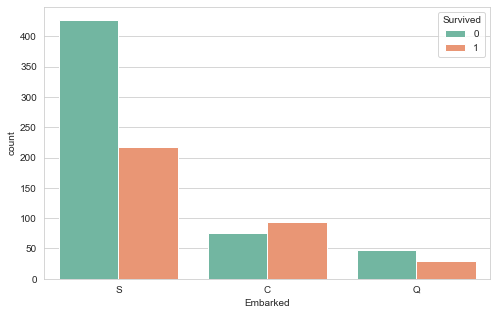

In [21]:
plt.figure(figsize= (8,5))
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, palette = 'Set2')

In [22]:
# Filling the missing values with 'S' as it is the most frecuently occuring value.
train['Embarked'].fillna('S', inplace = True)
test['Embarked'].fillna('S', inplace = True)

In [23]:
embark1 = pd.get_dummies(train['Embarked'])
embark2 = pd.get_dummies(test['Embarked'])

train.drop(['Embarked'], axis = 1, inplace = True)
test.drop(['Embarked'], axis = 1, inplace = True)

train = pd.concat([train, embark1], axis = 1)
test = pd.concat([test, embark2], axis = 1)

#### 6. SibSp and Parch

###### SibSp es el registro sobre hermanos y esposas
###### Parch es el registro sobre los padres e hijos

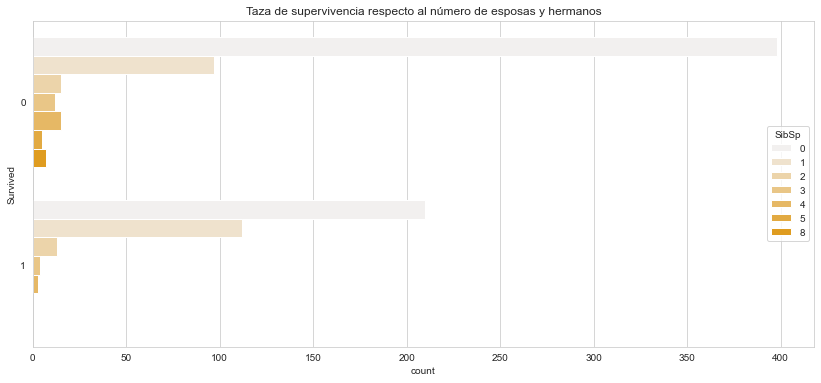

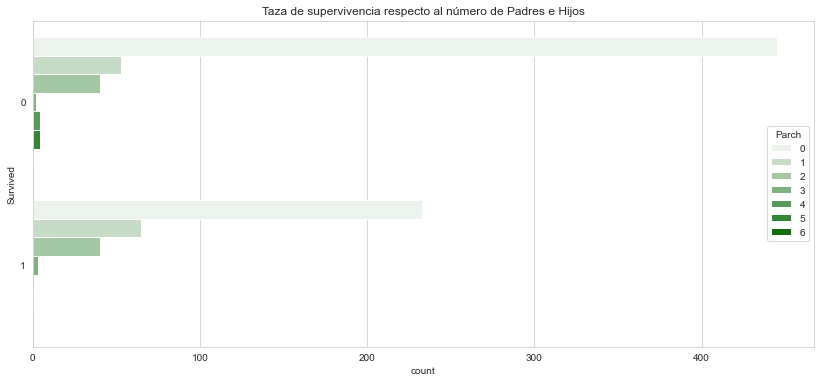

In [24]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(y='Survived', hue = 'SibSp', data = train, color = 'Orange')
plt.title('Taza de supervivencia respecto al número de esposas y hermanos')


plt.figure(figsize  = ( 14 ,6))
ax = sns.countplot(y = 'Survived', hue = 'Parch', data = train, color = 'Green')
plt.title('Taza de supervivencia respecto al número de Padres e Hijos')                   
                   
plt.show()

In [25]:
def fam(x):
    if(x['SibSp'] + x['Parch']) > 0:
        return 1
    else:
        return 0

train['Family'] = train.apply(fam, axis = 1)
test['Family'] = test.apply(fam, axis = 1)

###### AQUÍ COMBINAMOS LOS NUMEROS DE SibSp y Parch para juntarlos en una sola columna  y determinar si una persona tiene familiares o no.

In [26]:
train = train.drop(['SibSp','Parch'], axis = 1)
test = test.drop(['SibSp', 'Parch'], axis = 1)

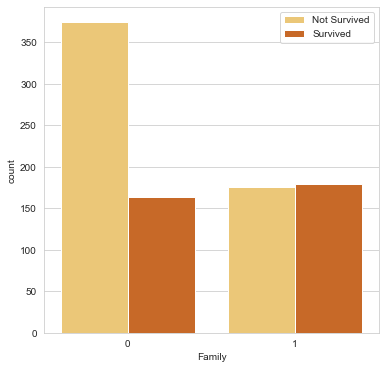

In [27]:
plt.figure(figsize = (6,6))
sns.set_style('whitegrid')
sns.countplot(x = 'Family', hue =  'Survived', data = train, palette = 'YlOrBr')
plt.legend(('Not Survived', 'Survived'))

##### Aqui nos damos cuenta de que los pasajeros sin familia tienen menos probabilidad de sobrevivir. 

##### Estas dos columnas por sí mismas no dan ninguna tendencia o valor que puediera ayudar a dar una predicción precisa, almenos que fueran combinadas.

#### 7. Cabin

###### 'Cabin' es una columna interesante que nos dice en que cabina estaba hospedado el pasajero.

In [28]:
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])
test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])
train

,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,Q,S,Family
0,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,X,1,0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,0,1,0,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,X,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C,0,0,0,1,1
4,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,X,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,211536,13.0000,X,1,0,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,B,0,0,0,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.4500,X,0,0,0,1,1
889,1,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,C,1,1,0,0,0


###### Los valores faltantes serán reemplazados con 'X'. Quitaremos los prefijos del número de cabina.

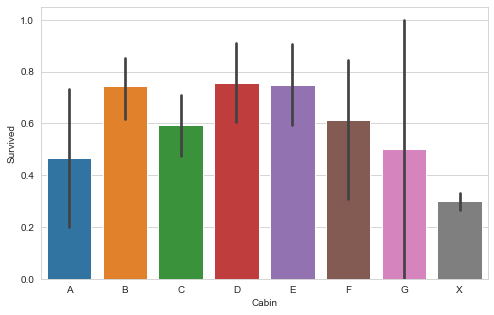

In [29]:
plt.figure(figsize = (8,5))
g = sns.barplot(y='Survived', x = 'Cabin', data = train,
                 
                order = ['A','B','C','D','E','F','G','X'])

###### Estas cabinas serán mapeadas con un valor numérico

In [30]:
train['Cabin'] = train['Cabin'].map({'X':0, 'A':1,  "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
train['Cabin'] = train['Cabin'].astype(int)
test['Cabin'] = test['Cabin'].map({'X':0, 'A':1,  "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
test['Cabin'] = test['Cabin'].astype(int)

#### 8. Names and Titles

###### En esta columna está registrado el nombre de cada pasajero así como algunos 'títulos'  que podría ser útil.
###### Dividiremos el título y el nombre

In [31]:
train_title = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]
train['Title'] = pd.Series(train_title)
test_title = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['Title'] = pd.Series(test_title)

In [32]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

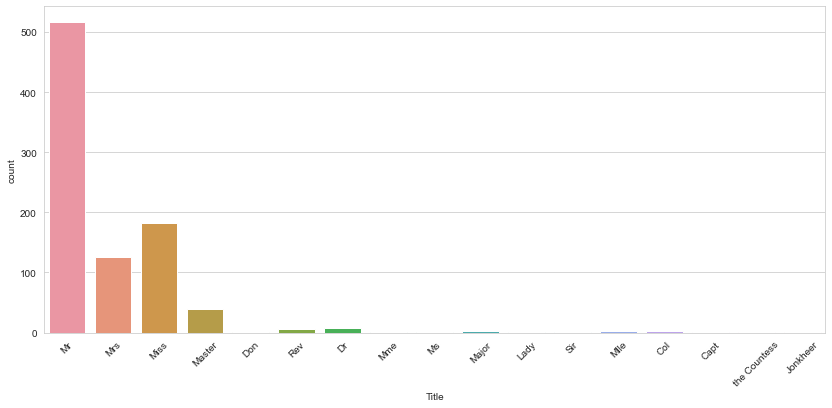

In [33]:
plt.figure(figsize = (14,6))
g = sns.countplot(x = 'Title', data = train)
g = plt.setp(g.get_xticklabels(), rotation = 45)

###### Aqui tenemos a los títulos asignados a un valor numérico

In [34]:
train

,Survived,Pclass,Age,Ticket,Fare,Cabin,male,C,Q,S,Family,Title
0,0,3,22.0,A/5 21171,7.2500,0,1,0,0,1,1,Mr
1,1,1,38.0,PC 17599,71.2833,3,0,1,0,0,1,Mrs
2,1,3,26.0,STON/O2. 3101282,7.9250,0,0,0,0,1,0,Miss
3,1,1,35.0,113803,53.1000,3,0,0,0,1,1,Mrs
4,0,3,35.0,373450,8.0500,0,1,0,0,1,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,211536,13.0000,0,1,0,0,1,0,Rev
887,1,1,19.0,112053,30.0000,2,0,0,0,1,0,Miss
888,0,3,28.0,W./C. 6607,23.4500,0,0,0,0,1,1,Miss
889,1,1,26.0,111369,30.0000,3,1,1,0,0,0,Mr


In [35]:
train['Title'] = train['Title'].replace(['Lady', 'the Countess','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
train['Title'] = train['Title'].map({'Master':0, 'Miss': 1, 'Ms': 1, 'Mme':1, 'Mlle':1, 'Mrs':1, 'Mr':2, 'Rare' : 3})
train['Title'] = train['Title'].astype(int)
test['Title'] = test['Title'].replace(['Lady', 'the Countess','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
test['Title'] = test['Title'].map({'Master':0, 'Miss': 1, 'Ms': 1, 'Mme':1, 'Mlle':1, 'Mrs':1, 'Mr':2, 'Rare' : 3})
test['Title'] = test['Title'].astype(int)

#### 9. Ticket

###### Esta columna tiene el número de ticket de todos los pasajeros.

In [36]:
# Aquí sacaremos el prefijo del ticket

Ticket1 = []
for i in list(train.Ticket):
    if not i.isdigit():
        Ticket1.append(i.replace('.','').replace('/','').strip().split(' ')[0]) 
    else:
        Ticket1.append('X')
train['Ticket'] = Ticket1     

Ticket2 = []

for j in list(test.Ticket):
    if not j.isdigit():
         Ticket2.append(j.replace('.','').replace('/','').strip().split(' ')[0]) 
    else:
        Ticket2.append('X')
test['Ticket'] = Ticket2  
        

###### Los datasets train y test tienen valores que son unicos para cada uno en esta columna que ya hemos modificado

In [37]:
train['Ticket'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [38]:
test['Ticket'].unique()

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

In [39]:
# Este es un set común en ambos tickets

np.union1d(train['Ticket'], test['Ticket'])

array(['A', 'A4', 'A5', 'AQ3', 'AQ4', 'AS', 'C', 'CA', 'CASOTON', 'FC',
       'FCC', 'Fa', 'LINE', 'LP', 'PC', 'PP', 'PPP', 'SC', 'SCA3', 'SCA4',
       'SCAH', 'SCOW', 'SCPARIS', 'SCParis', 'SOC', 'SOP', 'SOPP',
       'SOTONO2', 'SOTONOQ', 'SP', 'STONO', 'STONO2', 'STONOQ', 'SWPP',
       'WC', 'WEP', 'X'], dtype=object)

In [40]:
train= pd.get_dummies(train, columns = ["Ticket"], prefix="T")
test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")

###### Para mantener el mismo numero de columnas tuve que cambiar el set de prueba y quitar estos tickets unicos


In [41]:
test

,Pclass,Age,Fare,Cabin,male,C,Q,S,Family,Title,...,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_X
0,3,34.5,7.8292,0,1,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,3,47.0,7.0000,3,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,2,62.0,9.6875,0,1,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,3,27.0,8.6625,3,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1
4,3,22.0,12.2875,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,8.0500,0,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
414,1,39.0,108.9000,0,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
415,3,38.5,7.2500,0,1,0,0,1,0,2,...,0,0,0,1,0,0,0,0,0,0
416,3,28.0,8.0500,0,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1


In [42]:
#Estos son los tickets unicos que se quitarán

train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1)
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)

In [43]:
train.drop(['Survived'], axis = 1, inplace = True)

In [44]:
train.head(5)

,Pclass,Age,Fare,Cabin,male,C,Q,S,Family,Title,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
0,3,22.0,7.2500,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,3,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,35.0,53.1000,3,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1


In [48]:
train.to_csv('Train Data Processed.csv')

In [51]:
test.to_csv('Test Data Processed.csv')

###### Este es nuestro data set final después de procesarlo.

## Revisando valores faltantes en el nuevo dataframe

In [45]:
print(train.isnull().sum())
print('Number of columns are: ', train.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are:  32


In [46]:
print(test.isnull().sum())
print(f'Number of columns are : {test.isnull().sum().count()}')

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are : 32


In [58]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = (cross_val_score(model, train, np.ravel(pred), scoring = 'accuracy', cv=cv))
    j = j+1

In [59]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.837989,0.848315,0.842697,0.842697,0.820225,0.838384
GradientBoostingClassifier,0.843575,0.814607,0.825843,0.825843,0.803371,0.822648
LogisticRegression,0.810056,0.786517,0.814607,0.808989,0.825843,0.809202
AdaBoostClassifier,0.810056,0.792135,0.780899,0.786517,0.814607,0.796843
Linear SVM,0.787709,0.769663,0.792135,0.786517,0.803371,0.787879
KNeighborsClassifier,0.720670,0.707865,0.707865,0.685393,0.679775,0.700314
Radial SVM,0.709497,0.640449,0.719101,0.685393,0.606742,0.672237


#### RandomForestClassifier es el que da la mayor precisión

# Hyperparameter Tuning

##### Esta es la parte más importante del proyecto. Aquí el propósito es encontrar una combinación óptima de hiperparámetros que minimicen una función predefinida y de mejores resultados.


In [62]:
col_name1 = list(train.columns)
col_name2 = list(test.columns)

In [63]:
col_name1[0],col_name1[2] = col_name1[2] , col_name1[0]
col_name2[0],col_name2[2] = col_name2[2] , col_name2[0]

In [67]:
train_new = train[col_name1]
test_new =  test[col_name2]

In [69]:
train_new = train_new.drop(['Cabin'], axis = 1)
test_new = test_new.drop(['Cabin'], axis = 1)

In [74]:
sc = StandardScaler()
train3 = sc.fit_transform(train_new)
test3 = sc.fit_transform(test_new)

In [71]:
# Aplicando RandomForestClassifier con hyperparametro encendido en nuestro nuevo training dataset

rfc = RandomForestClassifier(random_state = 0)

In [72]:
param_grid = {
    'n_estimators':[200,300],
    'max_features':['auto','sqrt'],
    'max_depth':[6,7,8],
    'criterion':['gini','entropy']
}

In [75]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)
CV_rfc.fit(train3,pred)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [77]:
rfc1 = RandomForestClassifier(random_state=0,n_estimators= 200, criterion = 'gini', max_features = 'auto', max_depth = 8)
rfc1.fit(train3,pred)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [80]:
pred2 = rfc1.predict(test3)
print(pred2)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 1]


In [84]:
pred_test = pred2
output = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':pred_test})

In [86]:
output.to_csv('Prediction for Test dataset.csv', index = False)